# Yahoo Stock Prediction

## IMPORTING LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## LOADING DATA

In [38]:
df = pd.read_csv("F:/Data Scientist/ML projects in Resume/Yahoo/yahoo_stock.csv")
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [14]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
1820,2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
1821,2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
1822,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039
1823,2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117
1824,2020-11-20,3581.229980,3556.850098,3579.310059,3557.540039,2.236662e+09,3557.540039


In [11]:
df.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [15]:
df.shape

(1825, 7)

In [17]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1825.000000
mean,2660.718673,2632.817580,2647.704751,2647.856284,3.869627e+09,2647.856284
std,409.680853,404.310068,407.169994,407.301177,1.087593e+09,407.301177
min,1847.000000,1810.099976,1833.400024,1829.079956,1.296540e+09,1829.079956
25%,2348.350098,2322.250000,2341.979980,2328.949951,3.257950e+09,2328.949951
50%,2696.250000,2667.840088,2685.489990,2683.340088,3.609740e+09,2683.340088
75%,2930.790039,2900.709961,2913.860107,2917.520020,4.142850e+09,2917.520020
max,3645.989990,3600.159912,3612.090088,3626.909912,9.044690e+09,3626.909912


# DATA VISUALIZATION

<AxesSubplot:ylabel='Density'>

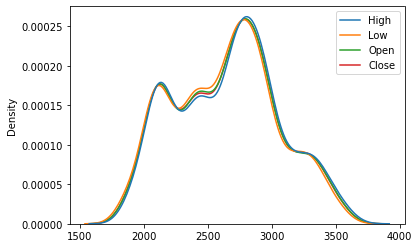

In [18]:
# Kernel Density Estimator Distribution
sns.kdeplot(data = df[['High', 'Low', 'Open', 'Close']])

<AxesSubplot:xlabel='Open', ylabel='Count'>

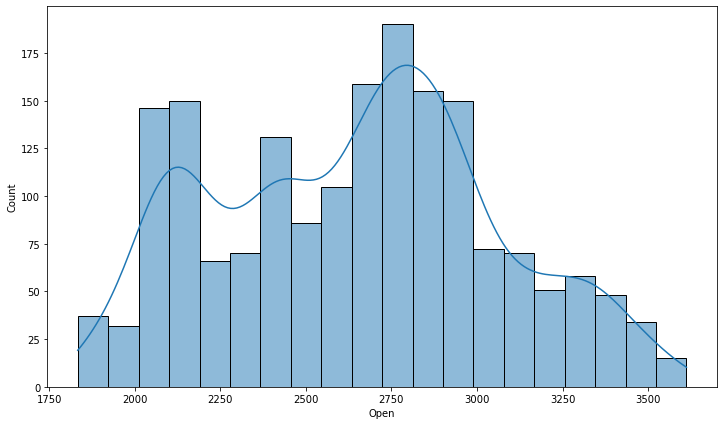

In [20]:
plt.figure(figsize=(12,7))
sns.histplot(data=df, x='Open', kde=True)

# DISTRIBUTION OF YAHOO STOCK CLOSING PRICE

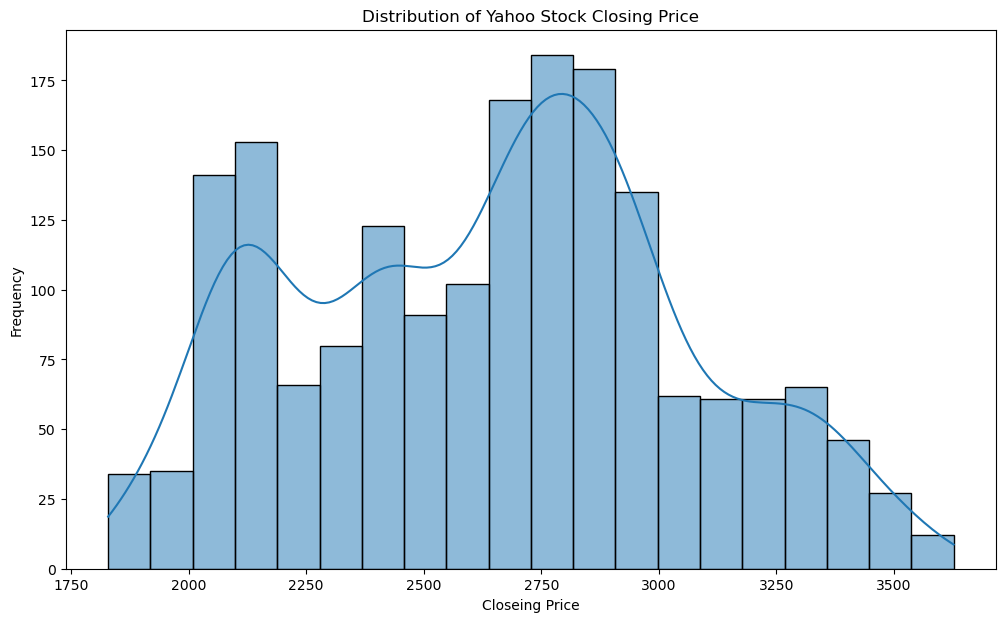

In [8]:
plt.figure(figsize=(12,7))
sns.histplot(data=df, x='Close', bins=20, kde=True)
plt.xlabel('Closeing Price')
plt.ylabel('Frequency')
plt.title('Distribution of Yahoo Stock Closing Price')
plt.show()

# DISTRIBUTION OF YAHOO STOCK CLOSING PRICE BY YEAR

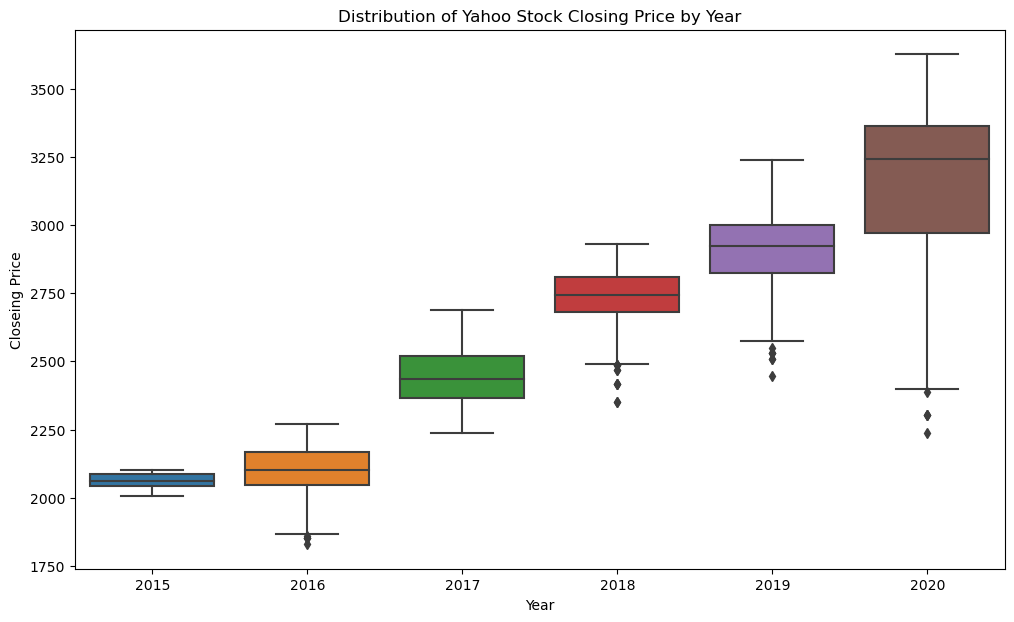

In [9]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
plt.figure(figsize=(12,7))
sns.boxplot(data=df, x='Year', y='Close')
plt.xlabel('Year')
plt.ylabel('Closeing Price')
plt.title('Distribution of Yahoo Stock Closing Price by Year')

plt.show()

# Split the Data Into Features (X) and Target Variable (y)

In [23]:
x = df[['High', 'Low', 'Open', 'Volume']].values
y = df['Close'].values

In [25]:
x

array([[2.09561011e+03, 2.08138989e+03, 2.08940991e+03, 3.58798000e+09],
       [2.09412012e+03, 2.07029004e+03, 2.08441992e+03, 3.88493000e+09],
       [2.09300000e+03, 2.08630005e+03, 2.08930005e+03, 2.85294000e+09],
       ...,
       [3.61909009e+03, 3.56733008e+03, 3.61209009e+03, 5.27445000e+09],
       [3.58521997e+03, 3.54384009e+03, 3.55940991e+03, 4.34720000e+09],
       [3.58122998e+03, 3.55685010e+03, 3.57931006e+03, 2.23666193e+09]])

In [26]:
y

array([2086.59008789, 2089.13989258, 2088.87011719, ..., 3567.79003906,
       3581.87011719, 3557.54003906])

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(x_test)

# Visualization the Linear Regression Predictions for 'Close' Values

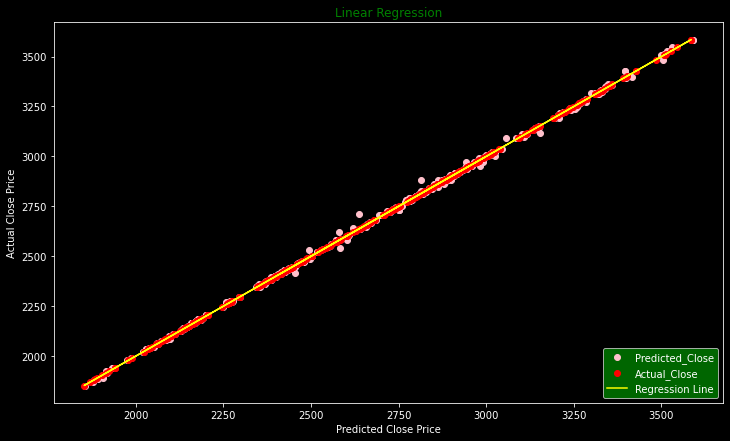

In [41]:
plt.figure(figsize=(12, 7))
plt.style.use('dark_background')
plt.title('Linear Regression', color="green")
plt.scatter(y_pred, y_test, color="#FFC0CB")
plt.scatter(y_test, y_test, color="red")
plt.plot(y_test, y_test, color="yellow")
plt.legend(["Predicted_Close", "Actual_Close", "Regression Line"], loc="lower right", facecolor='green', labelcolor='white')

plt.xlabel('Predicted Close Price')
plt.ylabel('Actual Close Price')

plt.show()

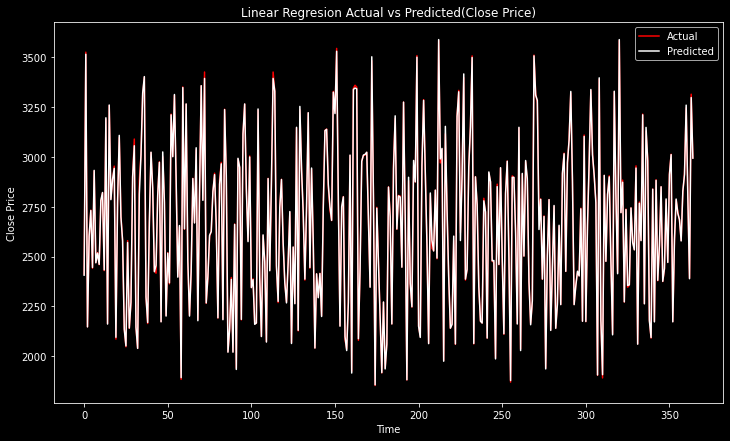

In [33]:
plt.figure(figsize=(12, 7))
plt.plot(y_test, color='red', label='Actual')
plt.plot(y_pred, color='white', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Linear Regresion Actual vs Predicted(Close Price)')
plt.legend()

plt.show()

# Model Evaluation

In [34]:
#Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error(MSE):", mse)

#Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error(RMSE):", rmse)

#Calculate R2 Score
r2 = r2_score(y_test, y_pred)
print("R-Squared Score:", r2)

Mean Squared Error(MSE): 102.95195436429114
Root Mean Squared Error(RMSE): 10.146524250416551
R-Squared Score: 0.9993804344883417


# Saving The Prediction Data as CSV file

In [36]:
#created df w/the predicted values
prediction_df = pd.DataFrame({'Predicted': y_pred})

#save df as a csv file
prediction_df.to_csv('Prediction.csv', index=False)

